*Imports*

In [1]:
import numpy as np
import pandas as pd

*Loading Dataset*

In [2]:
df=pd.read_csv('/kaggle/input/loan-credit-risk-and-population-stability/loan_2014_18.csv')
df

/tmp/ipykernel_35/2501680172.py:1: DtypeWarning: Columns (48,58,117) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/loan-credit-risk-and-population-stability/loan_2014_18.csv')
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,120122535,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,119374887,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,...,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,123.08000,6189.66,1062.71,N
2,2,119321612,40000.0,40000.0,40000.0,60 months,15.05%,952.65,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,120122034,16000.0,16000.0,16000.0,36 months,7.97%,501.17,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,118659541,33000.0,33000.0,33000.0,36 months,7.21%,1022.12,A,A3,...,Feb-2020,Apr-2020,Feb-2020,3.0,21.0,DELINQUENT,177.96231,10197.78,59.68,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2029948,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2029949,105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2029950,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag'],
      dtype='object', length=142)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029952 entries, 0 to 2029951
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(2), object(34)
memory usage: 2.1+ GB


In [5]:
df.isnull().sum()

Unnamed: 0                                          0
id                                                  0
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
                                               ...   
hardship_loan_status                          1956776
orig_projected_additional_accrued_interest    1938298
hardship_payoff_balance_amount                1935474
hardship_last_payment_amount                  1935474
debt_settlement_flag                                0
Length: 142, dtype: int64

In [6]:
df.describe()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,2.029952e+06,2.029952e+06,2.029952e+06,2.029952e+06,2.029952e+06,2.029952e+06,2.029952e+06,2.028241e+06,2.029952e+06,2.029952e+06,...,108021.000000,108021.000000,108021.000000,73278.000000,94478.000000,73278.000000,73277.000000,91654.000000,94478.000000,94478.000000
mean,9.659488e+04,8.897919e+07,1.519407e+04,1.519406e+04,1.518916e+04,4.485705e+02,7.871186e+04,1.910218e+01,3.163474e-01,6.984500e+02,...,12.533072,0.046352,0.077568,2.315279,141.533514,2.315279,3.660658,281.394978,8923.887583,692.346449
std,9.030445e+04,3.896571e+07,9.295733e+03,9.295733e+03,9.293755e+03,2.698034e+02,1.174887e+05,1.472265e+01,8.860822e-01,3.313907e+01,...,8.150964,0.411496,0.407996,0.595335,257.883701,0.595335,7.594415,374.449074,7476.875913,1748.843265
min,0.000000e+00,5.571600e+04,1.000000e+03,1.000000e+03,7.250000e+02,7.610000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.600000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.624900e+04,5.941328e+07,8.000000e+03,8.000000e+03,8.000000e+03,2.524000e+02,4.680000e+04,1.204000e+01,0.000000e+00,6.750000e+02,...,7.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,62.850000,2973.022500,243.930000
50%,7.249800e+04,9.162313e+07,1.300000e+04,1.300000e+04,1.300000e+04,3.784700e+02,6.500000e+04,1.805000e+01,0.000000e+00,6.900000e+02,...,11.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,172.913855,7162.765000,400.090000
75%,1.139810e+05,1.258020e+08,2.000000e+04,2.000000e+04,2.000000e+04,5.977800e+02,9.500000e+04,2.484000e+01,0.000000e+00,7.150000e+02,...,17.000000,0.000000,0.000000,2.000000,203.790000,2.000000,1.000000,373.372500,13256.362500,658.130000
max,4.210940e+05,1.456473e+08,4.000000e+04,4.000000e+04,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,106.000000,21.000000,23.000000,4.000000,2797.500000,4.000000,82.000000,8702.110000,40306.410000,33484.270000


In [7]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Late (31-120 days)', 'Charged Off',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

In [8]:
loan_status={'Fully Paid':1, 'Current':1, 'Late (31-120 days)':0, 'Charged Off':0,
       'In Grace Period':1, 'Late (16-30 days)':0, 'Default':0
    
}

df['loan_status_cate']=df['loan_status'].map(loan_status)
df=df.drop(columns=['loan_status'],axis=1)

In [9]:
df['loan_status_cate'].value_counts()

loan_status_cate
1    1704881
0     325071
Name: count, dtype: int64

*Deleted the columns having more than 50% Null values*

In [10]:
miss_df=pd.DataFrame(columns=['columns','miss_values'])
def missing(x):
    val=[]
    for i in x:
        values=df[i].isnull().sum()
        val.append(values/df.shape[0]*100)
    miss_df['columns']=x
    miss_df['miss_values']=pd.Series(val)
        
x=df.columns
missing(x)

In [11]:
miss_df.describe()

,miss_values
count,142.000000
mean,25.914142
std,38.941380
min,0.000000
25%,0.000000
50%,0.000000
75%,39.331102
max,96.395186


In [12]:
colmiss=list(miss_df[miss_df['miss_values']>=50]['columns'])

In [13]:
len(colmiss)

35

In [14]:
df=df.drop(columns=colmiss,axis=1)

In [15]:
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status_cate
0,0,120122535,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,...,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,N,N,1
1,1,119374887,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,...,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,Y,N,1
2,2,119321612,40000.0,40000.0,40000.0,60 months,15.05%,952.65,C,C4,...,0.0,0.0,0.0,367745.0,154261.0,64600.0,168145.0,N,N,1
3,3,120122034,16000.0,16000.0,16000.0,36 months,7.97%,501.17,A,A5,...,100.0,0.0,0.0,125018.0,128572.0,3700.0,96918.0,N,N,1
4,4,118659541,33000.0,33000.0,33000.0,36 months,7.21%,1022.12,A,A3,...,0.0,0.0,0.0,404510.0,48219.0,81700.0,73015.0,Y,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,...,0.0,1.0,1.0,103322.0,60812.0,28200.0,64422.0,N,N,0
2029948,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,...,14.3,0.0,0.0,132303.0,55863.0,34800.0,70203.0,N,N,1
2029949,105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,...,0.0,0.0,0.0,30400.0,14300.0,9000.0,0.0,N,N,0
2029950,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,...,0.0,0.0,0.0,47476.0,26201.0,8100.0,34076.0,N,N,1


In [16]:
df.isnull().sum()

Unnamed: 0                        0
id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
total_bc_limit                    0
total_il_high_credit_limit        0
hardship_flag                 21198
debt_settlement_flag              0
loan_status_cate                  0
Length: 107, dtype: int64

In [17]:
import matplotlib.pyplot as plt

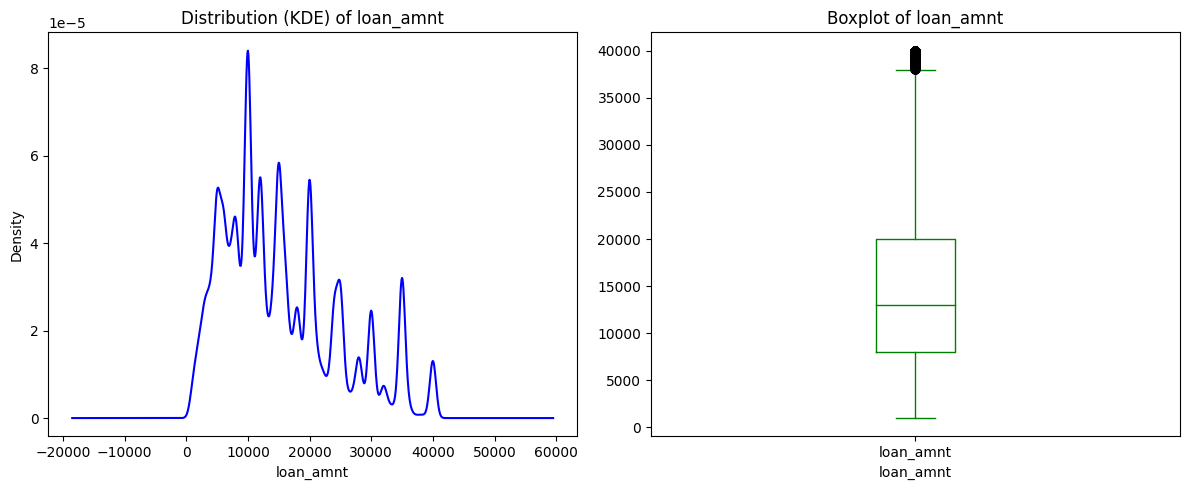

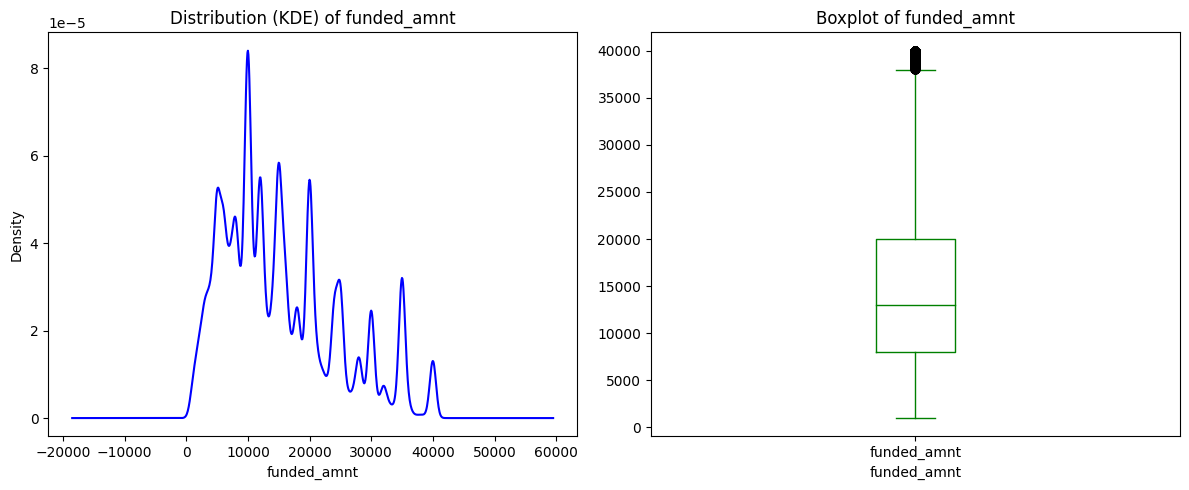

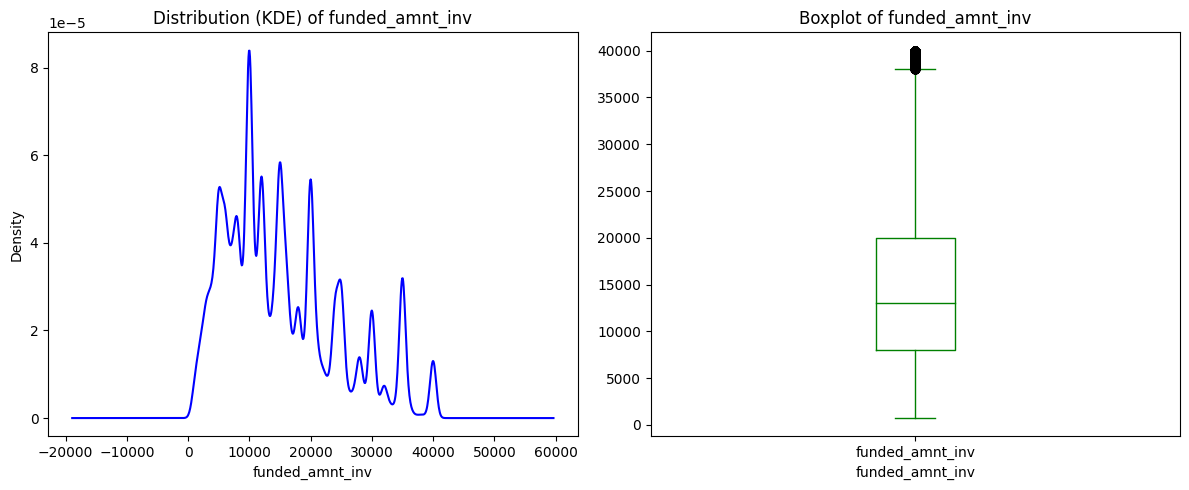

In [18]:
import matplotlib.pyplot as plt

for i in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']:
    plt.figure(figsize=(12, 5))  # Create a figure for each column

    # Subplot 1: KDE plot
    plt.subplot(1, 2, 1)
    df[i].plot(kind='kde', color='blue')
    plt.title(f'Distribution (KDE) of {i}')
    plt.xlabel(i)

    
    plt.subplot(1, 2, 2)
    df[i].plot(kind='box', color='green')
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)

    plt.tight_layout()
    plt.show()


*Transforming Catgeorical Columns*

In [19]:
obj_cols=df.select_dtypes(include='object')
obj_cols

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,...,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag
0,36 months,7.97%,A,A5,associate,10+ years,OWN,Source Verified,2017-09-01,n,...,923xx,CA,Jun-1996,37%,w,May-2020,May-2020,Individual,N,N
1,36 months,11.99%,B,B5,Nurse,10+ years,MORTGAGE,Source Verified,2017-09-01,n,...,080xx,NJ,Sep-2005,34.1%,w,May-2020,May-2020,Individual,Y,N
2,60 months,15.05%,C,C4,Driver,9 years,MORTGAGE,Verified,2017-09-01,n,...,778xx,TX,Apr-2002,20.7%,w,May-2020,May-2020,Individual,N,N
3,36 months,7.97%,A,A5,Senior Investigator,5 years,RENT,Not Verified,2017-09-01,n,...,223xx,VA,Jun-2000,57.7%,w,May-2020,May-2020,Individual,N,N
4,36 months,7.21%,A,A3,Registered Nurse,< 1 year,MORTGAGE,Verified,2017-09-01,n,...,750xx,TX,Dec-2005,16.1%,w,Apr-2020,May-2020,Joint App,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,60 months,23.99%,E,E2,Senior Escrow Officer,< 1 year,RENT,Source Verified,2017-04-01,n,...,801xx,CO,Apr-1995,24.9%,f,Mar-2018,May-2020,Individual,N,N
2029948,36 months,7.99%,A,A5,Rn,10+ years,MORTGAGE,Source Verified,2017-04-01,n,...,187xx,PA,Sep-1993,15.7%,w,Oct-2019,Oct-2019,Individual,N,N
2029949,36 months,16.99%,D,D1,Sales Associate,8 years,RENT,Not Verified,2017-04-01,n,...,220xx,VA,May-1993,47%,w,May-2019,Nov-2019,Individual,N,N
2029950,36 months,11.44%,B,B4,Contact input,5 years,RENT,Source Verified,2017-04-01,n,...,105xx,NY,May-1990,10.1%,w,Jan-2019,Mar-2020,Individual,N,N


In [20]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%Y')


In [21]:
df['int_rate']=df['int_rate'].str.strip()

In [22]:
df['int_rate']=pd.to_numeric(df['int_rate'].str.strip('%'))

In [23]:
df['revol_util']=df['revol_util'].str.strip()
df['revol_util']=pd.to_numeric(df['revol_util'].str.strip('%'))

In [24]:
df=df.drop(columns=['title','zip_code','pymnt_plan', 'emp_title','int_rate','revol_util', 'url'],axis=1)

In [25]:
df['debt_settlement_flag']=np.where(df['debt_settlement_flag']=='Y',1,0)

In [26]:
df['term']=np.where(df['term']=='36 months',1,0)

In [27]:
df['emp_length']=df['emp_length'].fillna('')
df['emp_length']=pd.to_numeric(df['emp_length'].str.replace('<','',regex=False).str[:2].str.strip(),errors='coerce')

In [28]:

df['hardship_flag']=df['hardship_flag'].fillna(df['hardship_flag'].mode())

In [29]:
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status_cate
0,0,120122535,12000.0,12000.0,12000.0,0,375.88,A,A5,10.0,...,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,N,0,1
1,1,119374887,32000.0,32000.0,32000.0,0,1062.71,B,B5,10.0,...,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,Y,0,1
2,2,119321612,40000.0,40000.0,40000.0,0,952.65,C,C4,9.0,...,0.0,0.0,0.0,367745.0,154261.0,64600.0,168145.0,N,0,1
3,3,120122034,16000.0,16000.0,16000.0,0,501.17,A,A5,5.0,...,100.0,0.0,0.0,125018.0,128572.0,3700.0,96918.0,N,0,1
4,4,118659541,33000.0,33000.0,33000.0,0,1022.12,A,A3,1.0,...,0.0,0.0,0.0,404510.0,48219.0,81700.0,73015.0,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,105446,102556443,24000.0,24000.0,24000.0,0,690.30,E,E2,1.0,...,0.0,1.0,1.0,103322.0,60812.0,28200.0,64422.0,N,0,0
2029948,105447,102653304,10000.0,10000.0,10000.0,0,313.32,A,A5,10.0,...,14.3,0.0,0.0,132303.0,55863.0,34800.0,70203.0,N,0,1
2029949,105448,102628603,10050.0,10050.0,10050.0,0,358.26,D,D1,8.0,...,0.0,0.0,0.0,30400.0,14300.0,9000.0,0.0,N,0,0
2029950,105449,102196576,6000.0,6000.0,6000.0,0,197.69,B,B4,5.0,...,0.0,0.0,0.0,47476.0,26201.0,8100.0,34076.0,N,0,1


In [30]:
def get_sort(x):
    obj_cols=x.select_dtypes(include=['object','category']).columns
    obj_nunique={i:x[i].nunique()  for i in obj_cols}

    nunique_c=pd.DataFrame(list(obj_nunique.items()),columns=['Column', 'Unique Count'])

    nunique_c=nunique_c.sort_values(by='Unique Count').reset_index(drop=True)
    return nunique_c
get_sort(df)

,Column,Unique Count
0,initial_list_status,2
1,application_type,2
2,hardship_flag,2
3,verification_status,3
4,home_ownership,5
5,grade,7
6,purpose,14
7,sub_grade,35
8,addr_state,51


In [31]:
df['grade'].nunique()

7

In [32]:
def value_counter(df):
    value_series = pd.DataFrame()
    for col in df.select_dtypes(["object"]).columns:
        print(df[col].value_counts(dropna = False))

value_counter(df)

grade
C    591304
B    588545
A    394264
D    290516
E    120001
F     34791
G     10531
Name: count, dtype: int64
sub_grade
C1    132442
B5    128339
B4    122760
C2    118336
C3    117664
C4    116100
B1    113099
B3    112899
B2    111448
C5    106762
A5     96619
A4     85953
A1     81395
D1     73405
A3     66457
D2     65396
A2     63840
D3     58384
D4     50676
D5     42655
E1     30128
E2     26086
E3     23633
E5     20282
E4     19872
F1     11407
F2      7658
F3      6404
F4      5020
F5      4302
G1      3524
G2      2292
G3      1816
G4      1504
G5      1395
Name: count, dtype: int64
home_ownership
MORTGAGE    995479
RENT        799121
OWN         234352
ANY            996
NONE             4
Name: count, dtype: int64
verification_status
Source Verified    833961
Not Verified       667220
Verified           528771
Name: count, dtype: int64
purpose
debt_consolidation    1146650
credit_card            468324
home_improvement       136961
other                  126119
major

In [33]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'medical',
       'home_improvement', 'major_purchase', 'small_business', 'house',
       'car', 'moving', 'vacation', 'renewable_energy', 'educational',
       'wedding'], dtype=object)

In [34]:
df=df.drop(columns=['sub_grade'],axis=1)

In [35]:
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status_cate
0,0,120122535,12000.0,12000.0,12000.0,0,375.88,A,10.0,OWN,...,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,N,0,1
1,1,119374887,32000.0,32000.0,32000.0,0,1062.71,B,10.0,MORTGAGE,...,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,Y,0,1
2,2,119321612,40000.0,40000.0,40000.0,0,952.65,C,9.0,MORTGAGE,...,0.0,0.0,0.0,367745.0,154261.0,64600.0,168145.0,N,0,1
3,3,120122034,16000.0,16000.0,16000.0,0,501.17,A,5.0,RENT,...,100.0,0.0,0.0,125018.0,128572.0,3700.0,96918.0,N,0,1
4,4,118659541,33000.0,33000.0,33000.0,0,1022.12,A,1.0,MORTGAGE,...,0.0,0.0,0.0,404510.0,48219.0,81700.0,73015.0,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,105446,102556443,24000.0,24000.0,24000.0,0,690.30,E,1.0,RENT,...,0.0,1.0,1.0,103322.0,60812.0,28200.0,64422.0,N,0,0
2029948,105447,102653304,10000.0,10000.0,10000.0,0,313.32,A,10.0,MORTGAGE,...,14.3,0.0,0.0,132303.0,55863.0,34800.0,70203.0,N,0,1
2029949,105448,102628603,10050.0,10050.0,10050.0,0,358.26,D,8.0,RENT,...,0.0,0.0,0.0,30400.0,14300.0,9000.0,0.0,N,0,0
2029950,105449,102196576,6000.0,6000.0,6000.0,0,197.69,B,5.0,RENT,...,0.0,0.0,0.0,47476.0,26201.0,8100.0,34076.0,N,0,1


*WOE and IV Calculation*

In [36]:
def woe(df, categorical_cols, target_col, woe_table=None, iv_summary=None, append=False):
   
    if append and (woe_table is None or iv_summary is None):
        raise ValueError("Existing tables must be provided when append=True.")
    
   
    if not append:
        woe_table = pd.DataFrame()
        iv_summary = pd.DataFrame()
    
    new_woe_results = []
    new_summary = []

    
    for col in categorical_cols:
       
        df[col] = df[col].fillna('NaN')
        
       
        stats = df.groupby(col).agg(
            event_count=(target_col, 'sum'),
            total_count=(target_col, 'count')
        ).reset_index()

        
        stats['non_event_count'] = stats['total_count'] - stats['event_count']
        total_events = stats['event_count'].sum()
        total_non_events = stats['non_event_count'].sum()

       
        stats['event_rate'] = stats['event_count'] / (total_events + 1e-6)
        stats['non_event_rate'] = stats['non_event_count'] / (total_non_events + 1e-6)
        stats['woe'] = np.log((stats['non_event_rate'] + 1e-6) / (stats['event_rate'] + 1e-6))
        stats['iv'] = (stats['non_event_rate'] - stats['event_rate']) * stats['woe']
        
    
        total_iv = stats['iv'].sum()

    
        stats['name'] = col  
        stats.rename(columns={col: 'sub_name'}, inplace=True)  
        stats = stats[['name', 'sub_name', 'event_count', 'total_count', 'non_event_count', 
                       'event_rate', 'non_event_rate', 'woe', 'iv']]

       
        new_woe_results.append(stats)
        new_summary.append({'Column': col, 'IV': total_iv})

    
    new_woe_table = pd.concat(new_woe_results, ignore_index=True)
    new_iv_summary = pd.DataFrame(new_summary).sort_values(by='IV', ascending=False)

    if append:
        woe_table = pd.concat([woe_table, new_woe_table], ignore_index=True)
        iv_summary = pd.concat([iv_summary, new_iv_summary], ignore_index=True).sort_values(by='IV', ascending=False)
    else:
        woe_table = new_woe_table
        iv_summary = new_iv_summary

    return woe_table, iv_summary

In [37]:
categorical_cols = df.select_dtypes(include=['object']).columns
woe_table, iv_summary = woe(df, categorical_cols, 'loan_status_cate')

In [38]:
iv_summary

,Column,IV
0,grade,0.446070
7,hardship_flag,0.108352
2,verification_status,0.065469
1,home_ownership,0.028805
3,purpose,0.018485
4,addr_state,0.014741
5,initial_list_status,0.009938
6,application_type,0.001999


In [39]:
df.select_dtypes(include=['object','category']).columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status', 'application_type',
       'hardship_flag'],
      dtype='object')

In [40]:
df['application_type']

0          Individual
1          Individual
2          Individual
3          Individual
4           Joint App
              ...    
2029947    Individual
2029948    Individual
2029949    Individual
2029950    Individual
2029951    Individual
Name: application_type, Length: 2029952, dtype: object

In [41]:
df=df.drop(columns=['application_type','initial_list_status','addr_state','purpose'],axis=1)
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status_cate
0,0,120122535,12000.0,12000.0,12000.0,0,375.88,A,10.0,OWN,...,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,N,0,1
1,1,119374887,32000.0,32000.0,32000.0,0,1062.71,B,10.0,MORTGAGE,...,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,Y,0,1
2,2,119321612,40000.0,40000.0,40000.0,0,952.65,C,9.0,MORTGAGE,...,0.0,0.0,0.0,367745.0,154261.0,64600.0,168145.0,N,0,1
3,3,120122034,16000.0,16000.0,16000.0,0,501.17,A,5.0,RENT,...,100.0,0.0,0.0,125018.0,128572.0,3700.0,96918.0,N,0,1
4,4,118659541,33000.0,33000.0,33000.0,0,1022.12,A,1.0,MORTGAGE,...,0.0,0.0,0.0,404510.0,48219.0,81700.0,73015.0,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,105446,102556443,24000.0,24000.0,24000.0,0,690.30,E,1.0,RENT,...,0.0,1.0,1.0,103322.0,60812.0,28200.0,64422.0,N,0,0
2029948,105447,102653304,10000.0,10000.0,10000.0,0,313.32,A,10.0,MORTGAGE,...,14.3,0.0,0.0,132303.0,55863.0,34800.0,70203.0,N,0,1
2029949,105448,102628603,10050.0,10050.0,10050.0,0,358.26,D,8.0,RENT,...,0.0,0.0,0.0,30400.0,14300.0,9000.0,0.0,N,0,0
2029950,105449,102196576,6000.0,6000.0,6000.0,0,197.69,B,5.0,RENT,...,0.0,0.0,0.0,47476.0,26201.0,8100.0,34076.0,N,0,1


In [42]:
woe_table[woe_table.name=='grade']

,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
0,grade,A,374655,394264,19609,0.219754,0.060322,-1.292798,0.206114
1,grade,B,523137,588545,65408,0.306847,0.201211,-0.421990,0.044577
2,grade,C,483810,591304,107494,0.283779,0.330679,0.152949,0.007173
3,grade,D,216983,290516,73533,0.127272,0.226206,0.575119,0.056899
4,grade,E,80098,120001,39903,0.046982,0.122752,0.960394,0.072769
5,grade,F,20448,34791,14343,0.011994,0.044123,1.302523,0.041849
6,grade,G,5750,10531,4781,0.003373,0.014708,1.472428,0.016690


In [43]:
woe_table[woe_table.name=='hardship_flag']

,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
84,hardship_flag,N,1633041,1953148,320107,0.957862,0.984729,0.027663,0.000743
85,hardship_flag,NaN,16591,21198,4607,0.009731,0.014172,0.375891,0.001669
86,hardship_flag,Y,55249,55606,357,0.032406,0.001098,-3.383783,0.105940


In [44]:
woe_table[woe_table.name=='verification_status']

,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
12,verification_status,Not Verified,589329,667220,77891,0.345672,0.239612,-0.366466,0.038867
13,verification_status,Source Verified,694890,833961,139071,0.407589,0.427817,0.048438,0.000980
14,verification_status,Verified,420662,528771,108109,0.246740,0.332570,0.298516,0.025622


In [45]:
woe_table[woe_table.name=='home_ownership']

,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
7,home_ownership,ANY,872,996,124,0.000511,0.000381,-0.292636,0.000038
8,home_ownership,MORTGAGE,858024,995479,137455,0.503275,0.422846,-0.174128,0.014005
9,home_ownership,NONE,4,4,0,0.000002,0.000000,-1.207827,0.000003
10,home_ownership,OWN,196277,234352,38075,0.115127,0.117128,0.017238,0.000035
11,home_ownership,RENT,649704,799121,149417,0.381085,0.459644,0.187431,0.014724


In [46]:
home_map={'ANY':'other','NONE':'other','MORTGAGE':'mortage','OWN':'own','RENT':'rent'}
df['home_ownership']=df['home_ownership'].map(home_map)

In [47]:
df['home_ownership']

0              own
1          mortage
2          mortage
3             rent
4          mortage
            ...   
2029947       rent
2029948    mortage
2029949       rent
2029950       rent
2029951    mortage
Name: home_ownership, Length: 2029952, dtype: object

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 14

font_path = fm.findfont(fm.FontProperties(family='Roboto Condensed'))

palette = {1: '#949398FF', 0: '#FC766AFF', 'NaN': '#D3D3D3'}  

def plain_formatter(x, _):
    return f'{int(x):,}' 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

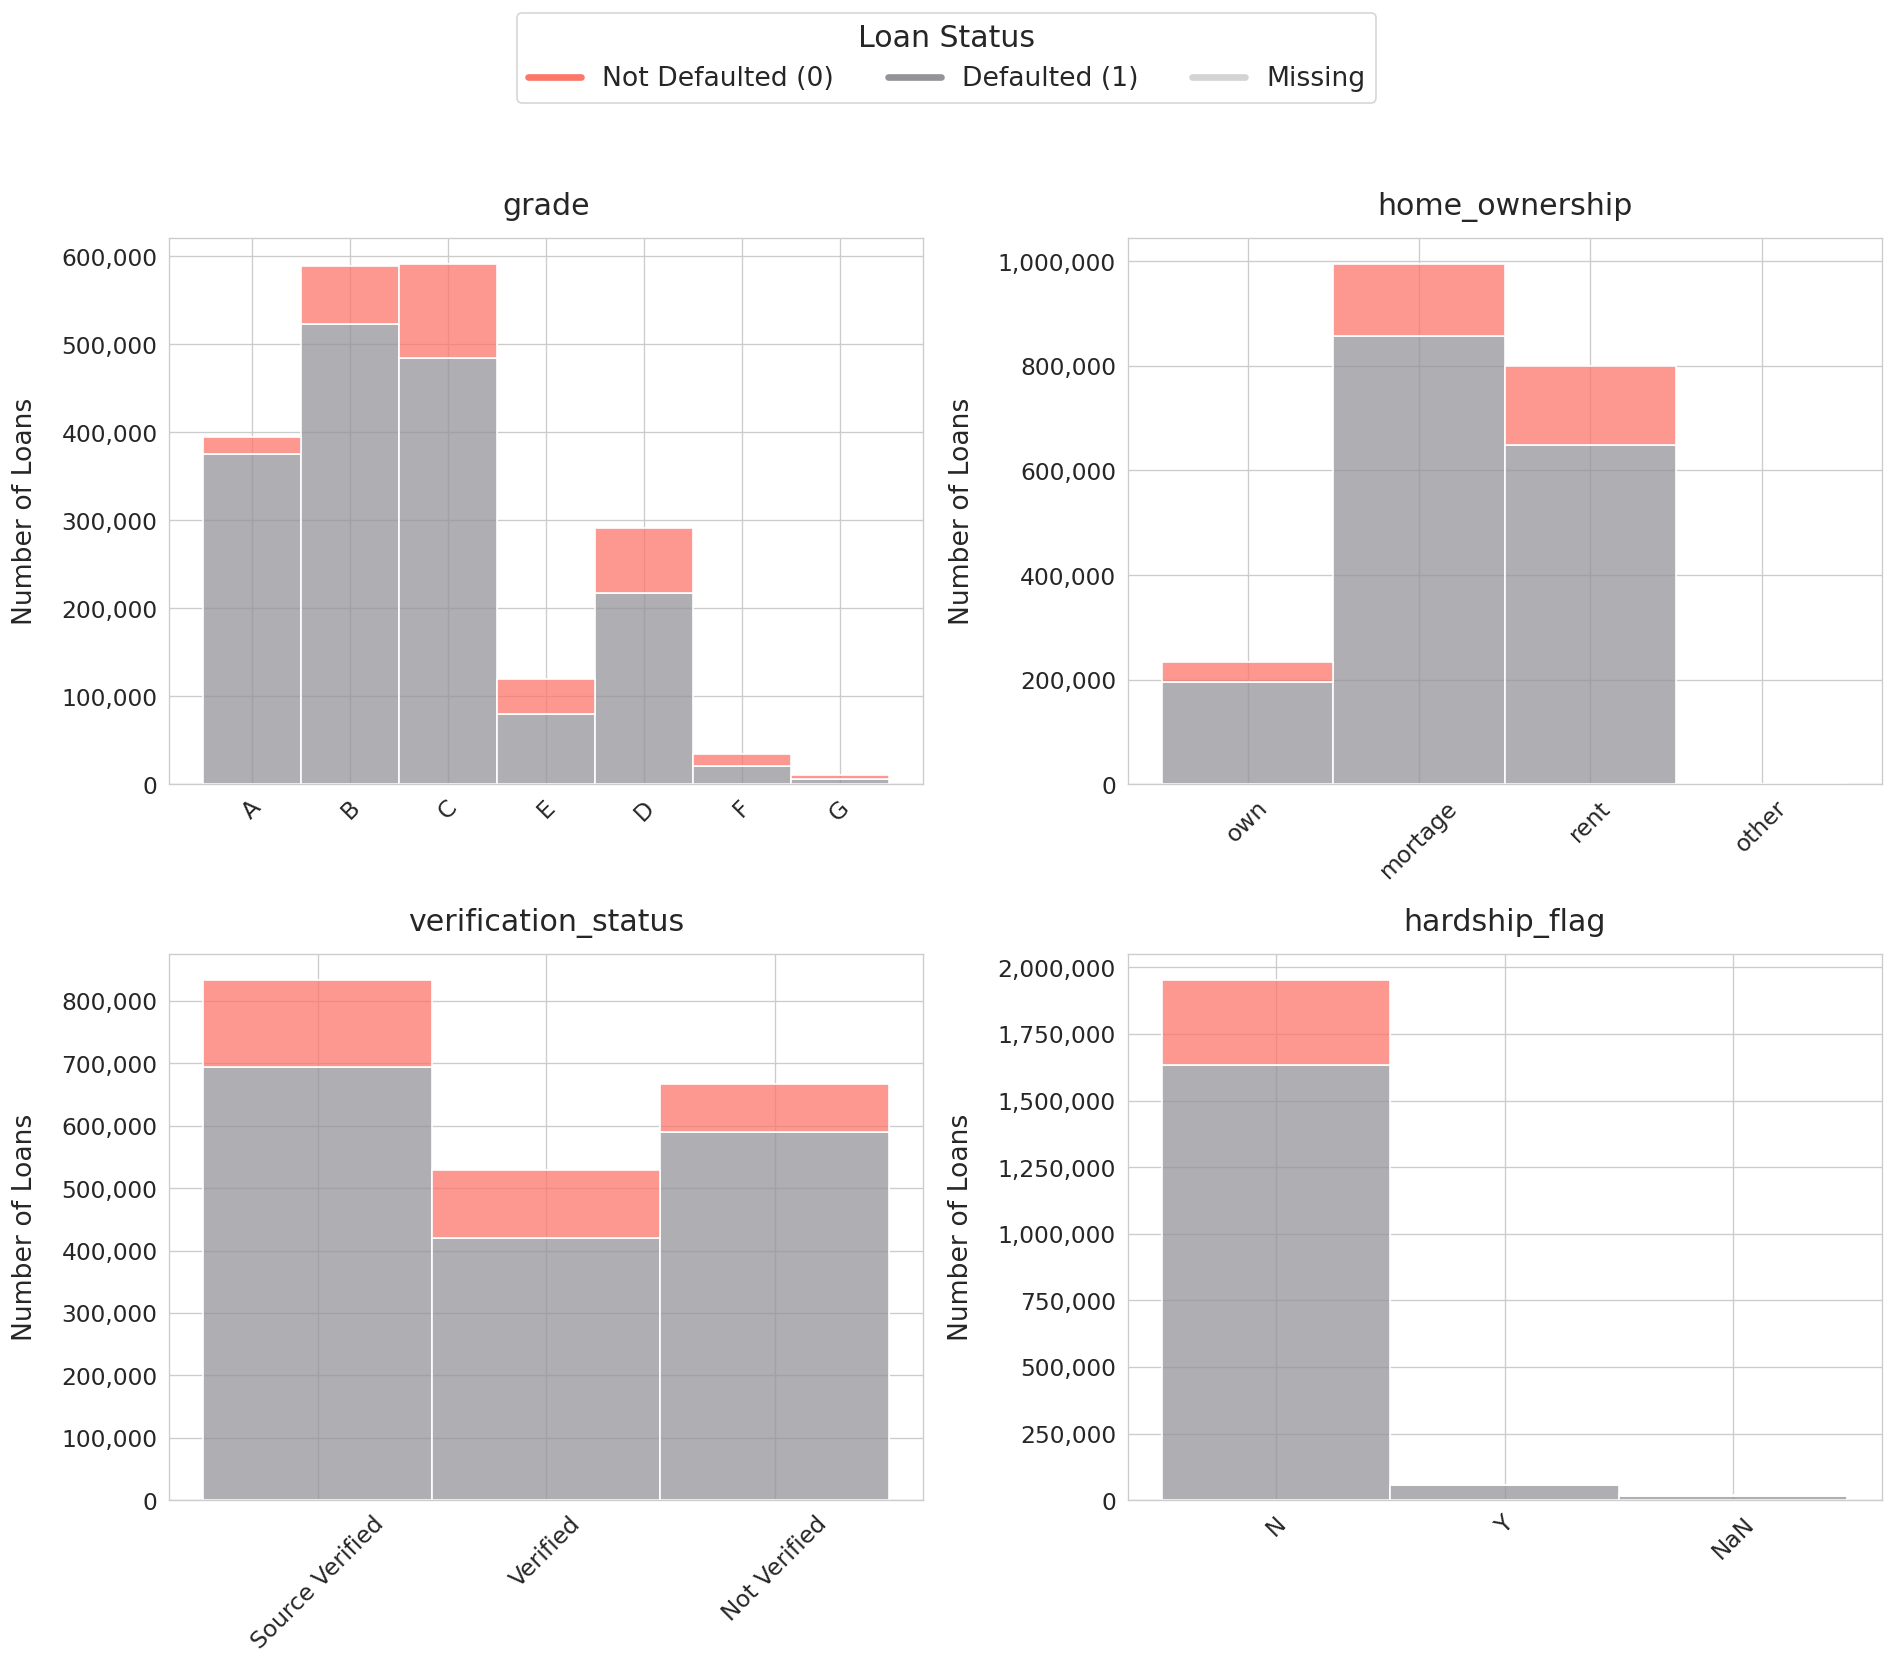

In [49]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


obj_cols = df.select_dtypes(include=['object']).columns


n_cols = 2
n_rows = math.ceil(len(obj_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 7))
axes = axes.flatten()


for i, col in enumerate(obj_cols):
    df[col] = df[col].fillna('NaN')
    sns.histplot(
        data=df,
        x=col,
        hue='loan_status_cate',
        multiple='stack',
        kde=False,
        palette=palette,
        hue_order=[0, 1, 'NaN'],  
        ax=axes[i],
        legend=False  
    )

    axes[i].set_title(col, fontsize=18, pad=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Number of Loans', fontsize=16, labelpad=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    axes[i].yaxis.set_major_formatter(FuncFormatter(plain_formatter))


for j in range(len(obj_cols), len(axes)):
    fig.delaxes(axes[j])

handles = [
    plt.Line2D([0], [0], color=palette[0], lw=4, label='Not Defaulted (0)'),
    plt.Line2D([0], [0], color=palette[1], lw=4, label='Defaulted (1)'),
    plt.Line2D([0], [0], color=palette['NaN'], lw=4, label='Missing')
]

fig.legend(
    handles=handles,
    loc='upper center',
    fontsize=16,
    title='Loan Status',
    title_fontsize=18,
    ncol=3
)

plt.tight_layout(rect=[0, 0, 1, 0.9])  
plt.show()


*Feature Generation*

In [50]:
date_cols=df.select_dtypes(include=['datetime64']).columns
df[date_cols].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2017-09-01,1996-06-01,2020-05-01,2020-05-01
1,2017-09-01,2005-09-01,2020-05-01,2020-05-01
2,2017-09-01,2002-04-01,2020-05-01,2020-05-01
3,2017-09-01,2000-06-01,2020-05-01,2020-05-01
4,2017-09-01,2005-12-01,2020-04-01,2020-05-01


In [51]:
from datetime import datetime

today=pd.to_datetime('today')

df['last_pymnt_d']=df['last_pymnt_d'].fillna(today)
df['last_credit_pull_d']=df['last_credit_pull_d'].fillna(today)



In [52]:
df['loan_age'] = (today - df['issue_d']).dt.days
df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df['time_since_last_payment'] = (today - df['last_pymnt_d']).dt.days
df['time_since_last_credit_pull'] = (today - df['last_credit_pull_d']).dt.days

In [53]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

df['recent_payment'] = (df['time_since_last_payment'] <= 30).astype(int)
df['recent_credit_pull'] = (df['time_since_last_credit_pull'] <= 90).astype(int)

drop = {'issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'}
df.drop(drop,axis=1, inplace=True)

In [54]:
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,emp_length,home_ownership,...,debt_settlement_flag,loan_status_cate,loan_age,credit_history_length,time_since_last_payment,time_since_last_credit_pull,issue_year,issue_month,recent_payment,recent_credit_pull
0,0,120122535,12000.0,12000.0,12000.0,0,375.88,A,10.0,own,...,0,1,2866,7762,1893,1893,2017,9,0,0
1,1,119374887,32000.0,32000.0,32000.0,0,1062.71,B,10.0,mortage,...,0,1,2866,4383,1893,1893,2017,9,0,0
2,2,119321612,40000.0,40000.0,40000.0,0,952.65,C,9.0,mortage,...,0,1,2866,5632,1893,1893,2017,9,0,0
3,3,120122034,16000.0,16000.0,16000.0,0,501.17,A,5.0,rent,...,0,1,2866,6301,1893,1893,2017,9,0,0
4,4,118659541,33000.0,33000.0,33000.0,0,1022.12,A,1.0,mortage,...,0,0,2866,4292,1923,1893,2017,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,105446,102556443,24000.0,24000.0,24000.0,0,690.30,E,1.0,rent,...,0,0,3019,8036,2685,1893,2017,4,0,0
2029948,105447,102653304,10000.0,10000.0,10000.0,0,313.32,A,10.0,mortage,...,0,1,3019,8613,2106,2106,2017,4,0,0
2029949,105448,102628603,10050.0,10050.0,10050.0,0,358.26,D,8.0,rent,...,0,0,3019,8736,2259,2075,2017,4,0,0
2029950,105449,102196576,6000.0,6000.0,6000.0,0,197.69,B,5.0,rent,...,0,1,3019,9832,2379,1954,2017,4,0,0


In [55]:
y=df['loan_status_cate']
df_col=df.select_dtypes(include='object').columns
df_num=df.select_dtypes(exclude='object').drop(columns=['loan_status_cate']).columns

In [56]:
df_final=pd.concat([df[df_num],pd.get_dummies(df[df_col],drop_first=True)],axis=1)
df_final

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,annual_inc,dti,...,grade_E,grade_F,grade_G,home_ownership_other,home_ownership_own,home_ownership_rent,verification_status_Source Verified,verification_status_Verified,hardship_flag_NaN,hardship_flag_Y
0,0,120122535,12000.0,12000.0,12000.0,0,375.88,10.0,42000.0,27.74,...,False,False,False,False,True,False,True,False,False,False
1,1,119374887,32000.0,32000.0,32000.0,0,1062.71,10.0,155000.0,12.35,...,False,False,False,False,False,False,True,False,False,True
2,2,119321612,40000.0,40000.0,40000.0,0,952.65,9.0,120000.0,31.11,...,False,False,False,False,False,False,False,True,False,False
3,3,120122034,16000.0,16000.0,16000.0,0,501.17,5.0,79077.0,15.94,...,False,False,False,False,False,True,False,False,False,False
4,4,118659541,33000.0,33000.0,33000.0,0,1022.12,1.0,107000.0,19.06,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,105446,102556443,24000.0,24000.0,24000.0,0,690.30,1.0,107000.0,11.65,...,True,False,False,False,False,True,True,False,False,False
2029948,105447,102653304,10000.0,10000.0,10000.0,0,313.32,10.0,65000.0,19.55,...,False,False,False,False,False,False,True,False,False,False
2029949,105448,102628603,10050.0,10050.0,10050.0,0,358.26,8.0,37000.0,20.56,...,False,False,False,False,False,True,False,False,False,False
2029950,105449,102196576,6000.0,6000.0,6000.0,0,197.69,5.0,41000.0,19.99,...,False,False,False,False,False,True,True,False,False,False


In [57]:
df_col

Index(['grade', 'home_ownership', 'verification_status', 'hardship_flag'], dtype='object')

In [58]:
df_final=df_final.drop(columns=['last_fico_range_high','last_fico_range_low','fico_range_low', 'fico_range_high','id'],axis=1)

In [59]:
df_final.isnull().sum()

Unnamed: 0                             0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
                                      ..
home_ownership_rent                    0
verification_status_Source Verified    0
verification_status_Verified           0
hardship_flag_NaN                      0
hardship_flag_Y                        0
Length: 102, dtype: int64

In [60]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_final)
df_final = pd.DataFrame(X_imputed, columns=df_final.columns)

*Feature Selection based on correlation*

In [61]:
corr=df_final.corrwith(y).abs()
corr_df=corr.sort_values(ascending=False).reset_index()
corr_df.columns = ['name', 'correlation']
corr_df

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,name,correlation
0,recoveries,0.528278
1,collection_recovery_fee,0.520392
2,debt_settlement_flag,0.357692
3,total_rec_prncp,0.343479
4,time_since_last_credit_pull,0.296586
...,...,...
97,total_cu_tl,0.000478
98,tot_coll_amt,0.000329
99,recent_credit_pull,0.000324
100,term,NaN


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

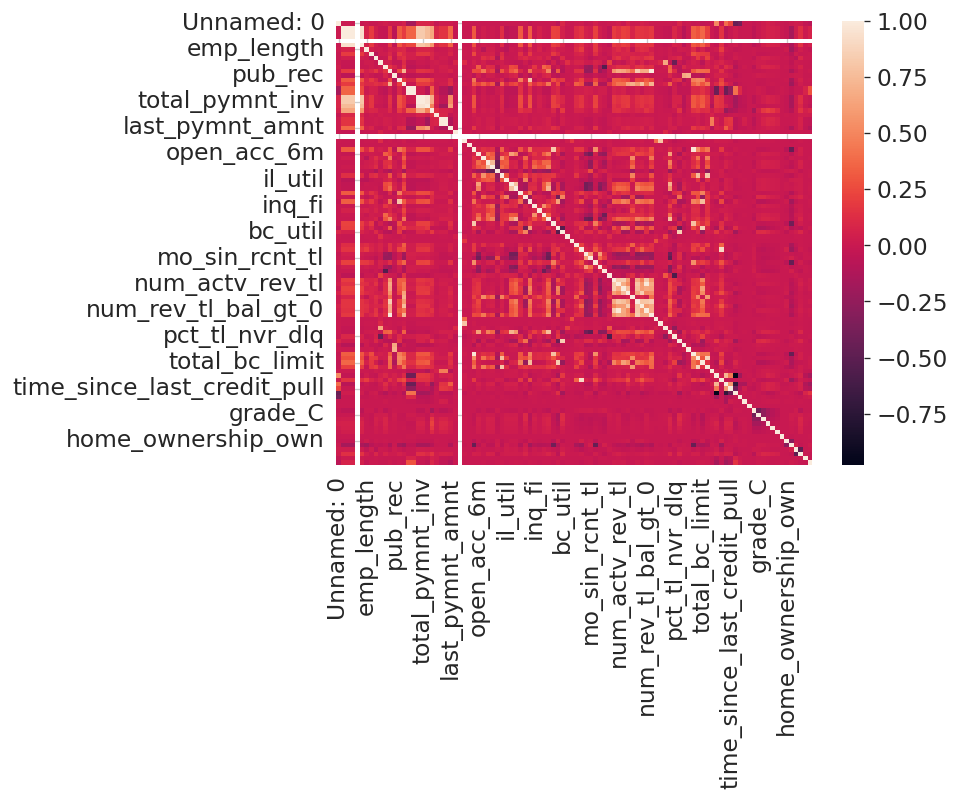

In [62]:
df_final_corr=df_final.corr()
sns.heatmap(df_final_corr)

In [63]:
threshold = 0.8
high_corr_pairs = df_final_corr.abs().stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > threshold]
high_corr_pairs.columns = ['F1','F2', 'Correlation']
high_corr_pairs

,F1,F2,Correlation
102,loan_amnt,funded_amnt,0.999999
103,loan_amnt,funded_amnt_inv,0.999994
104,loan_amnt,installment,0.945133
116,loan_amnt,total_pymnt,0.828604
117,loan_amnt,total_pymnt_inv,0.828653
...,...,...,...
7733,total_il_high_credit_limit,total_bal_il,0.807898
7775,total_il_high_credit_limit,total_bal_ex_mort,0.878709
7983,loan_age,issue_year,0.978079
8050,credit_history_length,mo_sin_old_rev_tl_op,0.915238


In [64]:
features_to_drop = set()

for  i,j in high_corr_pairs.iterrows():
    f1=j['F1']
    f2=j['F2']
    
    
    corr1 = corr_df[corr_df['name'] == f1]['correlation'].values[0]
    corr2 = corr_df[corr_df['name'] == f2]['correlation'].values[0]
    
    
    if corr1 >= corr2:
        features_to_drop.add(f2)
    else:
        features_to_drop.add(f1)

selected_features = [col for col in df_final_corr.columns if col not in features_to_drop]


print(f"Features to drop: {features_to_drop}")
print(f"Remaining features: {len(selected_features)}")

Features to drop: {'num_rev_tl_bal_gt_0', 'funded_amnt_inv', 'total_bc_limit', 'bc_util', 'out_prncp_inv', 'installment', 'num_sats', 'num_tl_30dpd', 'collection_recovery_fee', 'credit_history_length', 'loan_amnt', 'total_pymnt', 'num_bc_tl', 'issue_year', 'open_acc', 'tot_cur_bal', 'total_bal_il', 'num_op_rev_tl', 'num_actv_bc_tl', 'num_bc_sats', 'revol_bal', 'total_il_high_credit_limit', 'total_pymnt_inv', 'funded_amnt'}
Remaining features: 78


In [65]:
df_final['loan_amnt_div_instlmnt']=df_final['loan_amnt']/df_final['installment']

In [66]:
df_final=df_final.drop(columns=list(features_to_drop),axis=1)

In [67]:
X=df_final

*Feature Selection based on RandomForest*

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

model = SelectFromModel(rf, prefit=True, threshold="mean")
X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)


selected_features_mask = model.get_support()


selected_features_names = np.array(X.columns)[selected_features_mask]
selected_features_names

array(['out_prncp', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'debt_settlement_flag', 'loan_age', 'time_since_last_payment',
       'time_since_last_credit_pull', 'loan_amnt_div_instlmnt'],
      dtype=object)

*Model Building and Training*

In [70]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Results for {model_name}:")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F2 Score: {f2:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\n")
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Recall": recall,
        "F2": f2,
        "AUC": auc
    }

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score,
    classification_report, RocCurveDisplay)

In [72]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_selected, y_train)





LogisticRegression(random_state=42)

In [73]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_selected, y_train)

GradientBoostingClassifier(random_state=42)

In [74]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [75]:
results = []
results.append(evaluate_model(lr_model, X_test_selected, y_test, "Logistic Regression"))
results.append(evaluate_model(rf_model, X_test_selected, y_test, "Random Forest"))
results.append(evaluate_model(gb_model, X_test_selected, y_test, "Gradient Boosting"))


Results for Logistic Regression:
Confusion Matrix:
[[ 55933   8977]
 [  1627 339454]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     64910
           1       0.97      1.00      0.98    341081

    accuracy                           0.97    405991
   macro avg       0.97      0.93      0.95    405991
weighted avg       0.97      0.97      0.97    405991

Accuracy: 0.9739
Recall: 0.9952
F2 Score: 0.9910
AUC: 0.9812


Results for Random Forest:
Confusion Matrix:
[[ 63415   1495]
 [   302 340779]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     64910
           1       1.00      1.00      1.00    341081

    accuracy                           1.00    405991
   macro avg       1.00      0.99      0.99    405991
weighted avg       1.00      1.00      1.00    405991

Accuracy: 0.9956
Recall: 0.9991
F2 Score: 0.9984
AUC: 0.9985


Result

<Figure size 600x600 with 0 Axes>

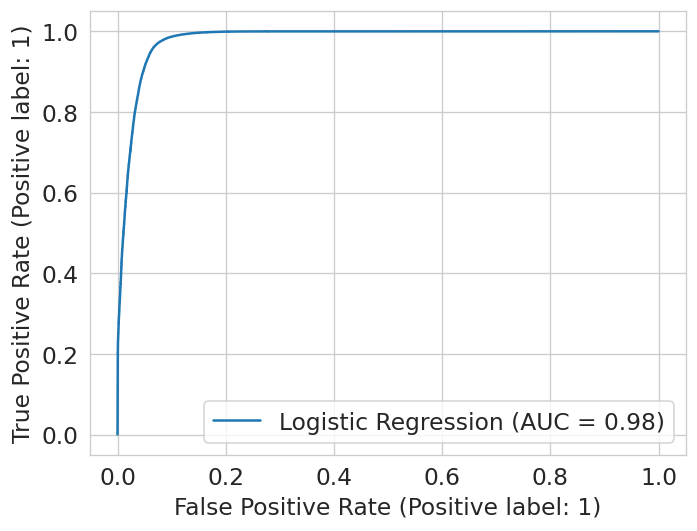

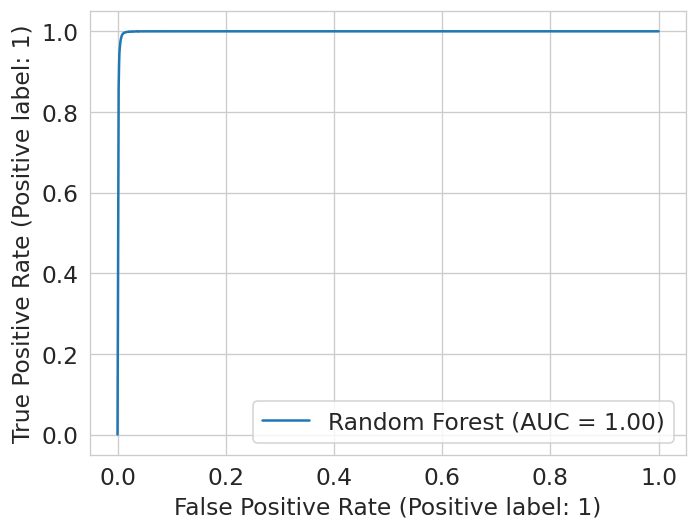

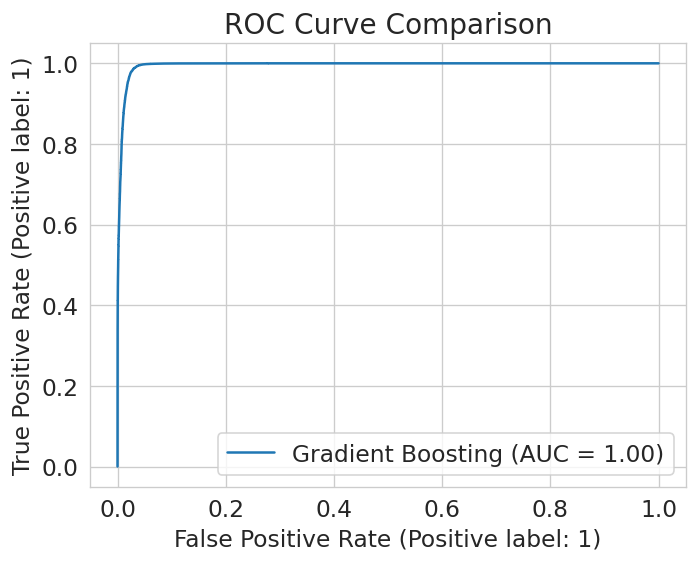

In [76]:
plt.figure(figsize=(5,5))
RocCurveDisplay.from_estimator(lr_model,X_test_selected,y_test,name='Logistic Regression')
RocCurveDisplay.from_estimator(rf_model,X_test_selected,y_test,name='Random Forest')
RocCurveDisplay.from_estimator(gb_model,X_test_selected,y_test,name='Gradient Boosting')
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

In [77]:
results_df = pd.DataFrame(results)
print("Summary of Results:")
print(results_df)

Summary of Results:
                 Model  Accuracy    Recall        F2       AUC
0  Logistic Regression  0.973881  0.995230  0.990959  0.981186
1        Random Forest  0.995574  0.999115  0.998416  0.998492
2    Gradient Boosting  0.986773  0.999220  0.996393  0.995480


*Neural Network*

In [78]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout


2025-07-07 11:09:30.034536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751886570.320569      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751886570.396542      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [79]:
X_train_selected.shape

(1623961, 11)

In [80]:
X_train_selected

array([[-0.39466563,  1.8874143 , -0.11832826, ...,  0.35249454,
        -0.68091231, -0.30383081],
       [-0.27134412, -1.1757527 , -0.84319613, ..., -1.10489085,
        -0.12145034, -0.58865747],
       [-0.39466563,  0.87285145, -0.1895702 , ..., -0.15354205,
         0.67703059, -0.80548993],
       ...,
       [-0.39466563,  0.87285145,  0.36004867, ..., -0.65773851,
        -0.12145034, -0.80548993],
       [-0.39466563, -0.41841036, -0.92515522, ..., -0.21058618,
         0.51418251, -0.20630679],
       [-0.39466563, -0.96865967, -0.05013073, ..., -0.21058618,
        -0.68091231,  1.5697357 ]])

In [81]:
y_train.shape

(1623961,)

In [82]:
model=Sequential()
#model.add(Dense(256,activation='relu',input_dim=11))
model.add(Dense(128,activation='relu',input_dim=11))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751886585.153725      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751886585.154483      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [83]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,537 (56.79 KB)

 Trainable params: 14,537 (56.79 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
history=model.fit(X_train_selected,y_train,epochs=5,validation_split=0.2)

Epoch 1/5


I0000 00:00:1751886588.390761     109 service.cc:148] XLA service 0x7f88c40239c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751886588.391391     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751886588.391415     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751886588.661061     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


   68/40599 ━━━━━━━━━━━━━━━━━━━━ 1:33 2ms/step - accuracy: 0.8651 - loss: 0.4192

I0000 00:00:1751886589.438670     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40599/40599 ━━━━━━━━━━━━━━━━━━━━ 111s 3ms/step - accuracy: 0.9861 - loss: 0.0502 - val_accuracy: 0.9936 - val_loss: 0.0235
Epoch 2/5
40599/40599 ━━━━━━━━━━━━━━━━━━━━ 108s 3ms/step - accuracy: 0.9938 - loss: 0.0238 - val_accuracy: 0.9944 - val_loss: 0.0206
Epoch 3/5
40599/40599 ━━━━━━━━━━━━━━━━━━━━ 109s 3ms/step - accuracy: 0.9946 - loss: 0.0212 - val_accuracy: 0.9952 - val_loss: 0.0188
Epoch 4/5
40599/40599 ━━━━━━━━━━━━━━━━━━━━ 109s 3ms/step - accuracy: 0.9949 - loss: 0.0202 - val_accuracy: 0.9951 - val_loss: 0.0197
Epoch 5/5
40599/40599 ━━━━━━━━━━━━━━━━━━━━ 109s 3ms/step - accuracy: 0.9952 - loss: 0.0189 - val_accuracy: 0.9956 - val_loss: 0.0169


In [86]:
model.evaluate(X_test_selected,y_test)

12688/12688 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9956 - loss: 0.0172


[0.017099281772971153, 0.9956575632095337]

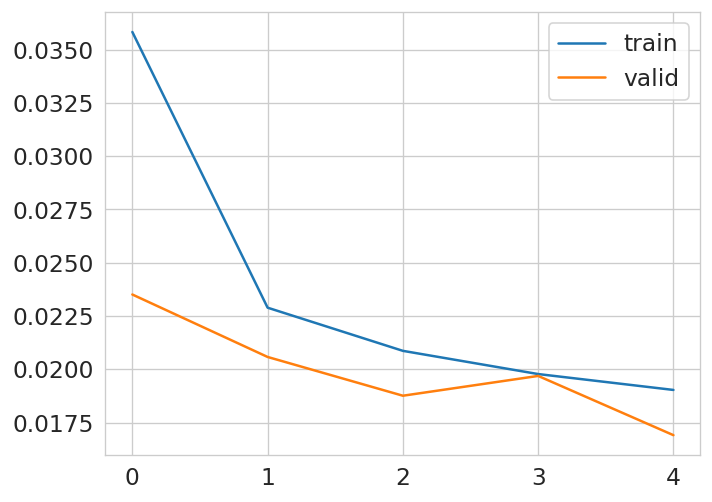

In [87]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='valid')
plt.legend()



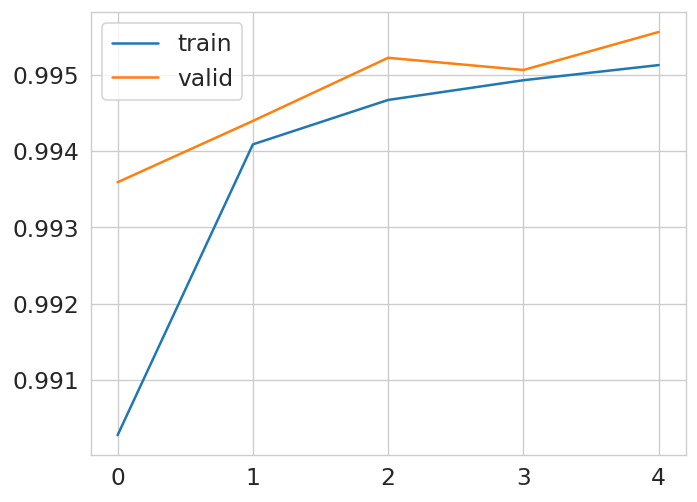

In [88]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='valid')
plt.legend()